In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv";
df = pd.read_csv(url, sep=';')
df

#df = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimeter=';')
#df = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#split tha data into train and test data
X = df.drop(columns=['quality'])
Y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

In [ ]:
#Training the Model
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
#predict the Values

y_pred = nb.predict(x_test)

In [ ]:
#printing the classification report

print("classification Report : ", classification_report(y_test, y_pred))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred), sep="\n")# if required

classification Report :                precision    recall  f1-score   support

           3       0.14      0.40      0.21         5
           4       0.23      0.24      0.24        25
           5       0.51      0.53      0.52       291
           6       0.52      0.33      0.41       432
           7       0.35      0.64      0.45       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.44       980
   macro avg       0.25      0.31      0.26       980
weighted avg       0.46      0.44      0.43       980

Confusion Matrix : 
[[  2   0   1   2   0   0   0]
 [  1   6   8   6   4   0   0]
 [  7  14 155  79  36   0   0]
 [  4   5 117 144 159   2   1]
 [  0   0  22  41 123   6   0]
 [  0   1   2   5  27   0   0]
 [  0   0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


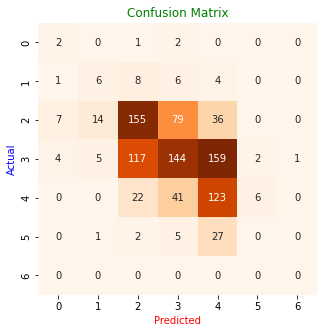

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize= (5, 5))
sns.heatmap(cm, annot= True, fmt = 'd', cmap= plt.cm.Oranges, cbar = False)
plt.xlabel("Predicted", color= "red")
plt.ylabel("Actual", color = 'blue')
plt.title("Confusion Matrix", color = "green")
plt.show()

In [ ]:
cm

array([[  2,   0,   1,   2,   0,   0,   0],
       [  1,   6,   8,   6,   4,   0,   0],
       [  7,  14, 155,  79,  36,   0,   0],
       [  4,   5, 117, 144, 159,   2,   1],
       [  0,   0,  22,  41, 123,   6,   0],
       [  0,   1,   2,   5,  27,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

Text(0.5, 1.0, 'Histogram of predicted class probabilities')

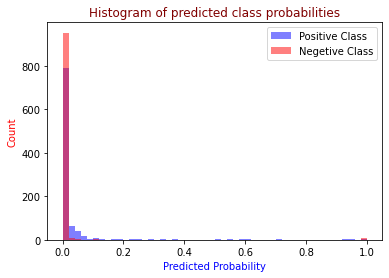

In [ ]:
#plot histogram of predicted class probabilities\

proba = nb.predict_proba(x_test)# returns 1d array
plt.hist(proba[:, 1], bins = 50, alpha = 0.5, label= "Positive Class", color= "Blue")
plt.hist(proba[:, 0], bins = 50, alpha = 0.5, label= "Negetive Class", color= "Red")
plt.xlabel("Predicted Probability", color= "Blue")
plt.ylabel("Count", color = "Red")
plt.legend()
plt.title("Histogram of predicted class probabilities", color= "Maroon")